**Now What?**

In the last section, we learned about the overall philosophical basis of Bayes statistics and we talked through a couple examples of coducting posterior inference with conjugate priors. As you might guess, there's a limit to the kinds of model for which we can come up with a simple closed form expression for the posterior distribution. In order to move further, we're next going to learn about computational methods (collectively known as Markov chain Monte Carlo) that allow us to approximate a posterior distribution, no matter how complex. Like some of the methods we've discussed so far, including Monte Carlo and Bootstrapping, MCMC methods will take advantage of random sampling processes in order to estimate some distribution. We'll extend our Fantasy Football model and in so doing we will have to encouter our first MCMC method, called Gibbs sampling. Then we consider models for which Gibbs sampling is inadequate and we will then learn about a very general and applcation method called the Metropolis-Hastings algorithm. Both of these methods are wide used in statistics and machine learning and enable use to devise and benefit from extremely complex statistical models.  

** A Harder Problem **

Let's return to our Fantasy Football idea and address a somewhere harder problem (though one that perhaps not actually useful for Fantasy Football but it's a good example). For each player, we observe how many points they've earned us in each game. And some players certainly earn more than others and really, certain types of players tend to earn us more points than others. For example, quarterbacks generally tend to earn more points than tight ends and certainly than kickers. So let's imagine something that is impractical for the sake of fantasy football, but will serve as a useful example problem to work through. Let's imagine we have a bunch of observations of points, but have lost track of who the players are and what the positions are. We generally think that kickers all probably score a similar number of points to each and that quarterbacks all probably score a similar number of points. What we want to do is to separate all the observations into different groups and estimate the properties of each group. We don't know the groups in advanced (well, pretend we don't) so we have no "ground truth" and this problem is an example of *unsupervised clustering*. Again, in the fantasy football context, this problem is a little silly, but unsupervised clustering is a very general idea that is at the heart of many useful and complex methods such as Latent Dirichlet Allocation and Hidden Markov Models. This simple unsupervised clustering problem will allow us to introduce the components at the base of our MCMC methods, which will be common in more complex methods.


Let's grab this data from some recent Fantasy Football games. 

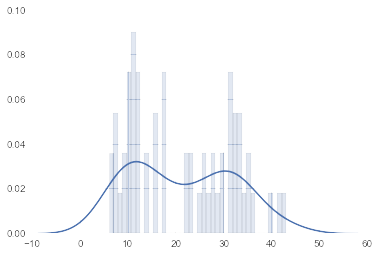

In [1]:
# Will scrape some real data and have it available, but for now just fake it

import numpy as np
import numpy.random as r
import seaborn as sns
%matplotlib inline

someFakeData =np.append( r.poisson(30,size=30),r.poisson(13,size=30))
sns.distplot(someFakeData,bins=40)

When we take a look at the data, we get a sense that it could be separated into multiple groups. That is, it might be the case that this data is a mixture of two different Poisson processes with two different $\lambda$ values. This is what we're going to try to solve with unsupervised clustering. We want to put all the data points into two groups, where the points within each group are similar, but the two groups themselves are dissimilar. 